# Bayesian Statistics

## 베이즈 정리

베이즈 정리는 사건(Event)에 대한 사전 지식으로 얻을 수 있는 모든 이벤트의 확률을 설명하는 것으로 이해할 수 있다. 베이즈 정리는 사건에 대한 데이터가 있고 사건과 관련된 조건에 대한 사전 지식이 있는 경우 사건의 조건부 확률을 설명하는 데 사용한다. 예를 들어, 로지스틱 회귀와 같은 통계 모델에 대해 이야기할 때 주어진 데이터에 대한 확률 분포로 간주할 수 있으며, 이 모델의 경우 베이즈 정리를 사용하여 모델의 매개 변수를 추정한다.

베이지안 통계의 확률은 신념의 정도로 취급할 수 있으므로, 베이지안 정리를 사용하여 정량화함으로써 신념을 생성할 수 있는 확률 분포를 매개변수(또는 매개변수 집합)에 직접 할당한다. 수학적으로 베이즈 정리는 다음과 같이 표현한다:


여기서 A와 B는 두 개의 사건이다. 더 자세히 설명하기 위한 예를 들자면, 각각 몇 개의 색깔의 공으로 구성된 두 개의 가방 A와 B가 주어져 있다. 빨간 공이 뽑힐 경우 가방 A에서 빨간 공이 뽑힐 확률을 구하기 위해 베이즈 정리를 사용한다면 후행 이벤트가 이미 발생했다는 가정 하에 선행 이벤트의 확률을 구하는 과정이다.

### 사전 확률

베이즈 정리의 공식에서 P(A)는 A의 사전 확률을 의미합니다. 사전 확률 또는 사전은 불확실한 양의 확률 분포로 정의할 수 있으며, 이는 증거를 고려하지 않거나 고려하기 전에 불확실한 양에 대한 믿음을 표현하는 것이다. 예를 들어, 엄청난 수의 공을 양동이에 분배해야 하는 경우 특정 양동이에 들어갈 공의 비율을 나타내는 확률 분포를 사전 확률 분포로 간주한다. 미지의 양의 예는 모든 통계 모델의매개변수가 될 수 있습니다. 공식 P(A)는 어떤 증거가 고려되기 전에 A의 발생에 대한 믿음을 표현한다.

### 확률 함수

베이즈 정리 공식에서 P(B|A)는 관측된 데이터의 합동 확률을 설명하는 데 도움이 되는 모든 통계 모델의 매개변수 함수로 정의할 수 있는 가능성 함수로, 간단히 확률이라고 할 수 있다. A가 참이라는 것을 알았을 때 B의 확률로 더 단순화한다. 수치적으로는 명제 A에 대한 지지가 증거 B에 의해 주어지는 지지값이다.

### 사후 확률

베이즈 정리 공식에서 P(B|A)는 존재하고 고려되는 관련 증거에 대한 지식이 있을 때 임의의 사건이나 불확실한 명제의 조건부 확률로 정의할 수 있는 사후 확률을 말한다. 베이즈 정리 확률 공식에 따르면 이 값은 증거 B가 고려되었을 때 A의 확률을 나타낸다.

위의 직관과 정의를 통해 베이즈 정리는 사후 확률은 가능성 확률, 사전 확률, 증거(B)가 참일 확률의 역의 곱과 같다는 식으로 쓸 수 있다.

다음 글에서는 이러한 기본 베이지안 통계가 어떻게 작동하는지, 파이썬에서 어떻게 수행할 수 있는지 이해할 수 있도록 예제를 살펴보겠습니다.

## Python 구현

이 모든 용어를 파이썬으로 살펴볼 수 있는 예를 들어 보겠다:

예를 들어 버킷 A와 B가 두 개 있다고 가정한다. 버킷 A에는 파란색 공 30개와 노란색 공 10개가 있고, 버킷 B에는 파란색 공 20개와 노란색 공 20개가 있다. 우리는 하나의 공을 선택해야 한다면, 버킷 A를 선택할 확률은 얼마나 될까?

두 버킷 중 하나를 선택할 확률은 같지만 선택한 버킷에서 파란색 공을 골랐다고 말할 수 있으므로 문제는 버킷 A에서 파란색 공을 골랐을 확률이 얼마인가 하는 것과 같다.

### 라이브러리 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

질문에 따르면 가설(Hypothesis)과 나타날 확률은 다음과 같습다:

In [4]:
hypos = 'bucket a', 'bucket b'
probs= 1/2,1/2

pandas 시리즈로 변환하여 계산을 수행한다:

In [5]:
prior = pd.Series(probs, hypos)
print(prior)

bucket a    0.5
bucket b    0.5
dtype: float64


여기서 시리즈는 이산 확률 변수의 확률 분포로 정의할 수 있는 확률 질량 함수를 나타내며, 보다 간단하게는 이산 확률 분포를 정의하는 도구로 간주할 수 있다.

문제에 따르면, 우리는 양동이 A에서 파란색 공을 선택할 확률은 ¾이고 양동이 B에서 어떤 공이나 파란색 공을 선택할 확률은 ½이라는 것을 알고 있다. 이 확률 또는 확률은 Liklihood 가능도(또는 가능성)이라 정의할 수 있다.

Liklihood 가능도는 결과 Y가 관측되었을 때 현상 X가 나타날 가능성

In [7]:
likelihood = 3/4, 1/2

In [8]:
unnorm = prior * likelihood
print(unnorm)

bucket a    0.375
bucket b    0.250
dtype: float64


사후확률을 정규화하기 위하여 정규화되지 않은 사후확률을 정규화되지 않은 확률의 합으로 나눈다.

In [12]:
prob_data = unnorm.sum()
prob_data

0.625

In [13]:
posterior = unnorm / prob_data
posterior

bucket a    0.6
bucket b    0.4
dtype: float64

여기서 베이즈 정리의 결과를 통해 파란색 공이 있는 버킷 A를 선택할 확률은 0.6이다.

이제 위 문제와 비슷한 상황에서 이전에 들어 올린 블록을 다시 넣고 비슷한 양동이에서 공을 선택했는데 노란색 공이라고 가정해 보자. 이제 두 번 모두 양동이 A를 선택하여 공을 골랐을 확률은 얼마일까?

여기서 첫 번째 문제에서 계산한 사후확률이 이 문제보다 앞선다고 말할 수 있는데, 이는 다음을 의미한다.

In [14]:
prior = posterior
print(prior)

bucket a    0.6
bucket b    0.4
dtype: float64


이러한 문제가 발생할 가능성 Liklihood는 다음과 같다:

In [15]:
likelihood = 3/4, 1/2

정규화되지 않은 사후확률은 다음과 같다:

In [16]:
unnorm = prior * likelihood
print(unnorm)

bucket a    0.45
bucket b    0.20
dtype: float64


정규화되지 않은 사후확률의 합을 구하면:

In [17]:
prob_data = unnorm.sum()
prob_data

0.6499999999999999

이때 사후 확률은:

In [18]:
posterior = unnorm / prob_data
print(posterior)

bucket a    0.692308
bucket b    0.307692
dtype: float64


여기서 두 번째 시도에서 버킷 A의 사후 확률이 0.428571임을 알 수 있다.

계산된 사후 확률이 1을 더해야 합니다. 그 이유는 매우 간단하다. 가설은 "보완적"이기 때문에 첫 번째 또는 두 번째 상황 중 하나만 참일 수 있고 둘 다 참일 수 없다. 정규화되지 않은 사후확률을 합산하면 사후확률은 1로만 합산된다.

이번에는 문제의 복잡도를 높여서 101개의 버킷이 있고 공의 분포가 아래와 같이 주어진 점과 같다고 가정해 봅자:

버킷 0에는 파란색 공이 o개 있다.
버킷 1에는 파란색 공이 1% 있다.
버킷 2에는 파란색 공이 2% 있다.

그리고 다음까지
버킷 99에는 파란색 공이 99% 있다.
버킷 100에는 파란색 공이 100% 있다.

이전 예제에서는 버킷의 유형이 두 가지뿐이었다. 이제 이 문제에서는 버킷 0에 100% 노란색 공이 있고 버킷 1에 99% 노란색 공이 있는 식으로 두 개의 버킷이 있다.

이제 무작위로 양동이를 선택하고 공을 골랐는데 파란색으로 판명되었다고 가정해 보자. xxx의 각 값에 대해 공이 버킷 xxx 에서 나왔을 확률은 얼마일까?

이 문제를 해결하기 위해 숫자의 간격이 같은 0에서 100까지의 일련의 숫자를 만들어 보자.

In [19]:
xs = np.linspace(0, 1, num=101)
prob = 1/101
prior = pd.Series(prob, xs)
prior.head()

0.00    0.009901
0.01    0.009901
0.02    0.009901
0.03    0.009901
0.04    0.009901
dtype: float64

문제가 주어지면 파란색 공의 분포를 시각화하여 예상을 확인할 수 있다.

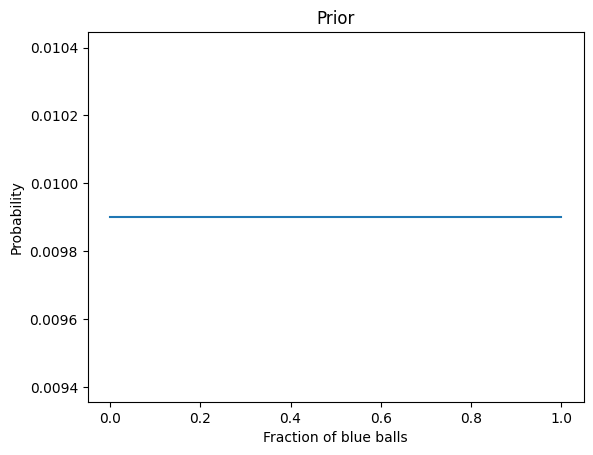

In [27]:
prior.plot()
plt.xlabel('Fraction of blue balls')
plt.ylabel('Probability')
plt.title('Prior');

파란색 공의 확률은 $xs의 분포된 숫자와 같다고 할 수 있다.

In [28]:
likelihood_blue = xs
print(likelihood_blue)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


노란색 공에 대한 Liklihood 가능성이다:

In [29]:
likelihood_yellow = 1-xs
print(likelihood_yellow)

[1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87
 0.86 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73
 0.72 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59
 0.58 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45
 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31
 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17
 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07 0.06 0.05 0.04 0.03
 0.02 0.01 0.  ]


이 상황에 대한 정규화되지 않은 사후확률은은 다음과 같다:

In [30]:
unnorm = prior * likelihood_blue
print(unnorm)

0.00    0.000000
0.01    0.000099
0.02    0.000198
0.03    0.000297
0.04    0.000396
          ...   
0.96    0.009505
0.97    0.009604
0.98    0.009703
0.99    0.009802
1.00    0.009901
Length: 101, dtype: float64


그리고 파란색 공을 고르는 사후확률은은 다음과 같다:

In [31]:
posterior = unnorm / unnorm.sum()

파란 공 쿠키의 사후확률은 버킷 xxx 에서 가져온 것으로, xxx의 각 값은 다음과 같다:

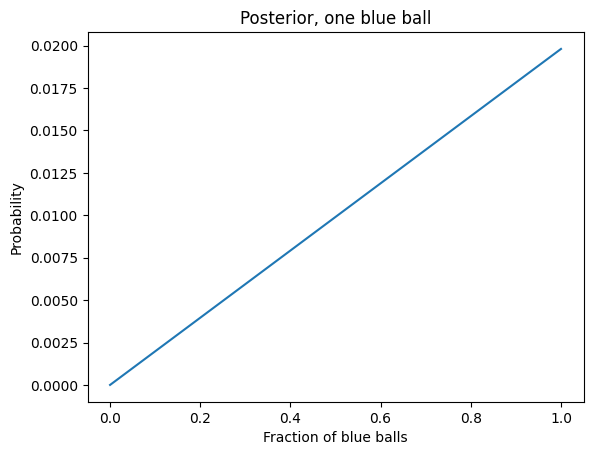

In [32]:
posterior.plot()

plt.xlabel('Fraction of blue balls')
plt.ylabel('Probability')
plt.title('Posterior, one blue ball');

다시 같은 방법으로 공을 다시 넣고 같은 양동이에서 공을 골라 이제 파란색 공을 가져온다. 사후확률은 어떻게 될까?

여기서도 위의 문제에서 후자가 아래 절차의 전자가 될 것이라고 말할 수 있다:

In [33]:
prior = posterior
unnorm = prior * likelihood_blue
posterior = unnorm / unnorm.sum()

사후확률 시각화하기

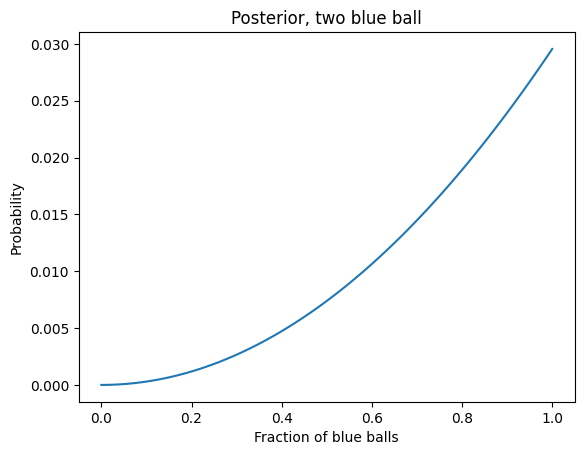

In [34]:
posterior.plot()
plt.xlabel('Fraction of blue balls')
plt.ylabel('Probability')
plt.title('Posterior, two blue ball');

이제 공을 다시 양동이에 넣고 다시 공을 골라 노란색 공을 얻었다고 가정해 보자. 이제 이후의 확률은 어떻게 될까?

In [35]:
prior = posterior
unnorm = prior * likelihood_yellow
posterior = unnorm / unnorm.sum()

Plotting the posterior:

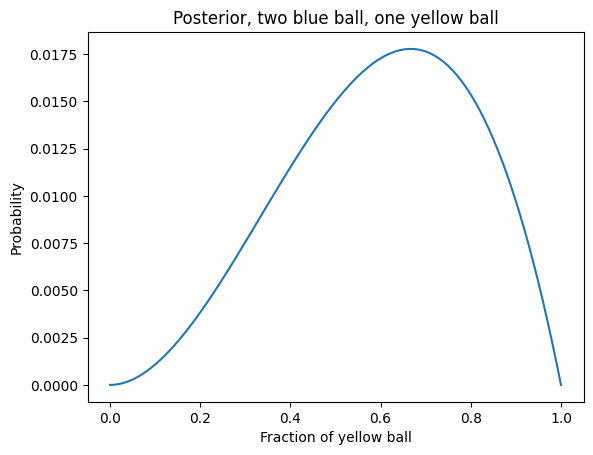

In [36]:
posterior.plot()
plt.xlabel('Fraction of yellow ball')
plt.ylabel('Probability')
plt.title('Posterior, two blue ball, one yellow ball');

여기서 노란색 공이 나오는 상황에 대한 사후확률을 파악할 수 있다.